In [75]:
from AI_Decomposed import *

In [76]:
image_file = './imgs/porche_2.jpg'
[height, width ,red, green, blue] = image_meta(image_file)

width:  1200  height:  675


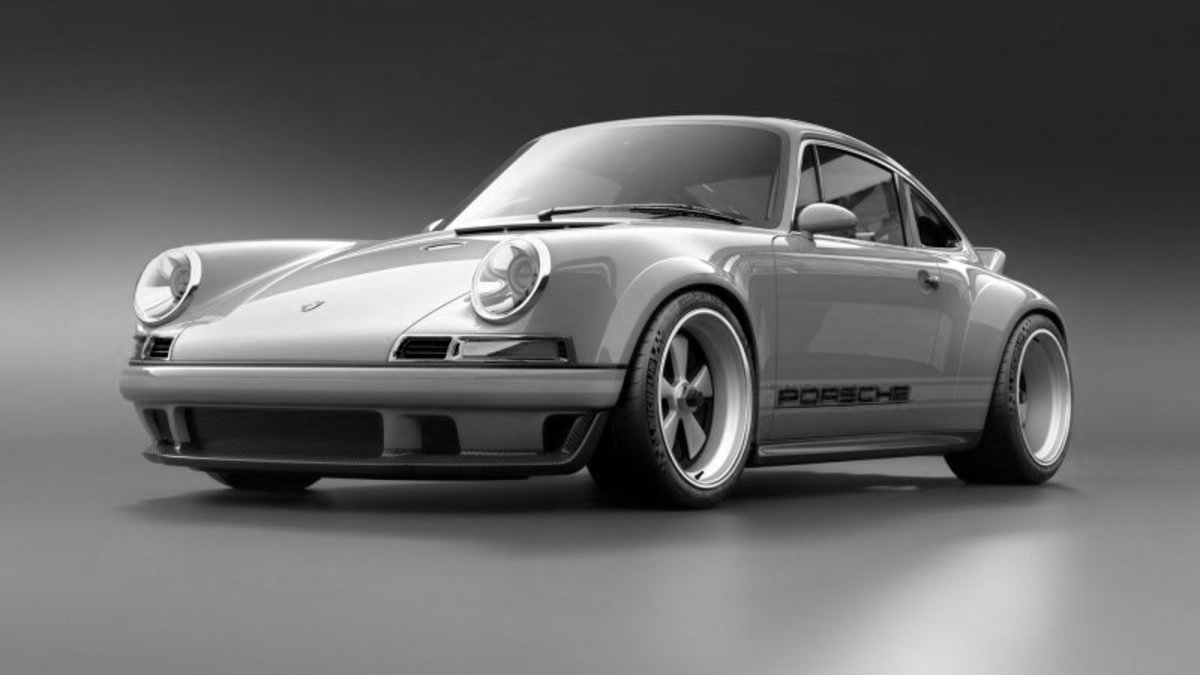

In [77]:
print('width: ', width, ' height: ', height)
display_channel(green, width)

8.24 seconds to convolve  810000  pixel image


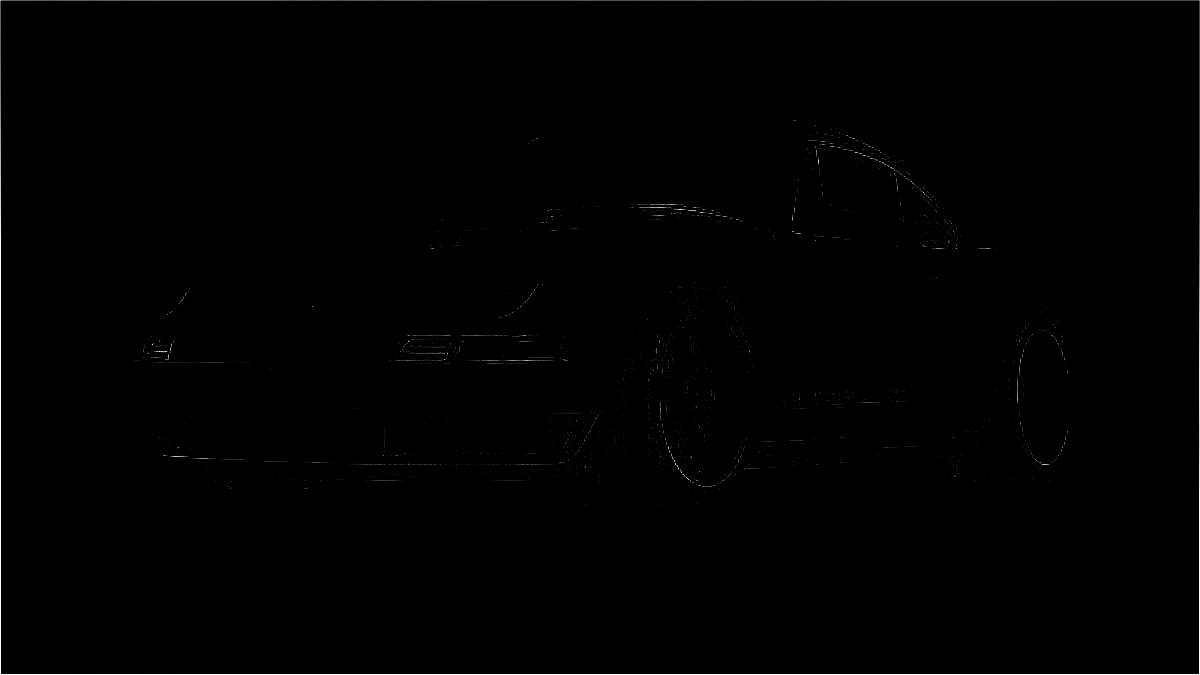

In [78]:
import time
start = time. time()
# create kernel
kernel = np.array([[-1,-1,-1], [-1,7,-1], [-1,-1,-1]])
# convert to matrix
green_array = np.asarray(green).reshape(height,width)
# add zero pad border
green_padded = np.pad(green_array, 1, 'constant')
# convolute
green_convolved = convolve(green_padded, kernel)
print(round(time.time() - start, 2), 'seconds to convolve ', (width* height),' pixel image')
# display convolution
green_convolved_list = list(np.array(green_convolved).flat)
display_channel(green_convolved_list, width)

width:  120  height:  67


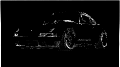

In [92]:
green_array = np.asarray(green_convolved_list).reshape(height,width)
green_pooled = pooling(green_array,ksize=(10,10))
print('width: ', green_pooled.shape[1], ' height: ', green_pooled.shape[0])
green_pooled_list = list(np.array(green_pooled).flat)
display_channel(green_pooled_list, green_pooled.shape[1])

In [93]:
w = green_pooled.shape[1]
h = green_pooled.shape[0]
print(h,' x ',w,'=',(w*h))

67  x  120 = 8040


In [95]:
np.asarray(green_pooled_list).reshape(h,w)

array([[ 192,   96,   96, ...,   78,   76,  148],
       [  98,  -49,  -49, ...,  -35,  -37,   74],
       [ 102,  -47,  -47, ...,  -35,  -34,   76],
       ...,
       [ 268, -130, -128, ..., -144, -145,  312],
       [ 266, -129, -127, ..., -147, -148,  312],
       [ 264, -127, -127, ..., -151, -146,  318]])

In [96]:
import numpy as np

In [97]:
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [103]:
# data    
vector_length = len(green_pooled_list)
# X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
X = np.array([
    green_pooled_list,
    list(range(len(green_pooled_list))),
    green_pooled_list,
    list(range(len(green_pooled_list))),
    green_pooled_list,
    list(range(len(green_pooled_list))),
    green_pooled_list,
    list(range(len(green_pooled_list))),
])

# labels
y = np.array([[1],[0],[1],[0],[1],[0],[1],[0]])

np.random.seed(1)

# randomly initialize our weights with mean 0
layer_size = 50
syn0 = 2*np.random.random((vector_length, layer_size)) - 1
syn1 = 2*np.random.random((layer_size,1)) - 1

for j in range(60000):
    # Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2

    if (j% 10000) == 0:
        print('Error:', str(np.mean(np.abs(l2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error * nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

Error: 0.5411795699137354
Error: 0.0008349320502530193
Error: 0.0005902289257931994
Error: 0.0004818523991243172
Error: 0.0004172588028474979
Error: 0.00037318357842371075
